In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from sklearn import tree
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [19]:
df_horror = pd.read_csv("../HorrorCleanedCookies.csv")
df_horror.head()

,Title,Author,Year,Rating,Raters
0,The Shining (Paperback),Stephen King,1977,4.26,1331732
1,It (Paperback),Stephen King,1986,4.25,979436
2,Dracula (Paperback),Bram Stoker,1897,4.01,1119957
3,Carrie (Mass Market Paperback),Stephen King,1974,3.98,630669
4,Pet Sematary (Kindle Edition),Stephen King,1983,4.04,516341


In [20]:
minRaters=min(df_horror.Raters)
maxRaters=max(df_horror.Raters)
meanRaters=df_horror.Raters.mean()
print('Min Raters :',minRaters)
print('Max Raters :',maxRaters)
print('Mean Raters :',meanRaters)

Min Raters : 266
Max Raters : 5922520
Mean Raters : 76444.321857486


In [43]:
#rating class column
conditions  = [ df_horror.Rating >= 4, (df_horror.Rating < 4) & (df_horror.Rating > 3.5), (df_horror.Rating <= 3.5) ]
choices     = [ "good", 'above average', 'mediocre' ]
df_horror["rating_class"] = np.select(conditions, choices, default="mediocre")
#rater class column
conditions  = [ df_horror.Raters >= 25000, (df_horror.Raters < 25000) & (df_horror.Raters> 1000), (df_horror.Raters <= 1000) ]
choices     = [ "large", 'medium', 'small' ]
df_horror["raters_class"] = np.select(conditions, choices, default="small")

df_horror['worth_reading']=np.where(((df_horror.rating_class == "above average") & (df_horror.raters_class == "large"))|((df_horror.rating_class == "good") & ((df_horror['raters_class'] == "large")|(df_horror["raters_class"] =="medium"))) ,'yes','no')

In [50]:
df_horror.head()

,Title,Author,Year,Rating,Raters,rating_class,raters_class,worth_reading
0,The Shining (Paperback),Stephen King,1977,4.26,1331732,good,large,yes
1,It (Paperback),Stephen King,1986,4.25,979436,good,large,yes
2,Dracula (Paperback),Bram Stoker,1897,4.01,1119957,good,large,yes
3,Carrie (Mass Market Paperback),Stephen King,1974,3.98,630669,above average,large,yes
4,Pet Sematary (Kindle Edition),Stephen King,1983,4.04,516341,good,large,yes


In [45]:
#split dataset in features and target variable
feature_cols=['rating_class','raters_class']
X = df_horror[feature_cols] # Features
y = df_horror['worth_reading'] # Target variable

print(X)
print(y)

       rating_class raters_class
0              good        large
1              good        large
2              good        large
3     above average        large
4              good        large
...             ...          ...
1244       mediocre        large
1245       mediocre       medium
1246  above average       medium
1247       mediocre       medium
1248           good        large

[1249 rows x 2 columns]
0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
1244     no
1245     no
1246     no
1247     no
1248    yes
Name: worth_reading, Length: 1249, dtype: object


In [46]:
X=pd.get_dummies(X)
X

,rating_class_above average,rating_class_good,rating_class_mediocre,raters_class_large,raters_class_medium,raters_class_small
0,0,1,0,1,0,0
1,0,1,0,1,0,0
2,0,1,0,1,0,0
3,1,0,0,1,0,0
4,0,1,0,1,0,0
...,...,...,...,...,...,...
1244,0,0,1,1,0,0
1245,0,0,1,0,1,0
1246,1,0,0,0,1,0
1247,0,0,1,0,1,0


In [47]:
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)
y_predict=model.predict(X)

#Printing the text representation of the tree and the accuracy score
text_rep = tree.export_text(model)
print(text_rep)
print(metrics.accuracy_score(y,y_predict))

|--- feature_3 <= 0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: no
|   |--- feature_1 >  0.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: yes
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: no
|--- feature_3 >  0.50
|   |--- feature_2 <= 0.50
|   |   |--- class: yes
|   |--- feature_2 >  0.50
|   |   |--- class: no

1.0


In [48]:
print(y.ravel())
print(y_predict.ravel())

['yes' 'yes' 'yes' ... 'no' 'no' 'yes']
['yes' 'yes' 'yes' ... 'no' 'no' 'yes']


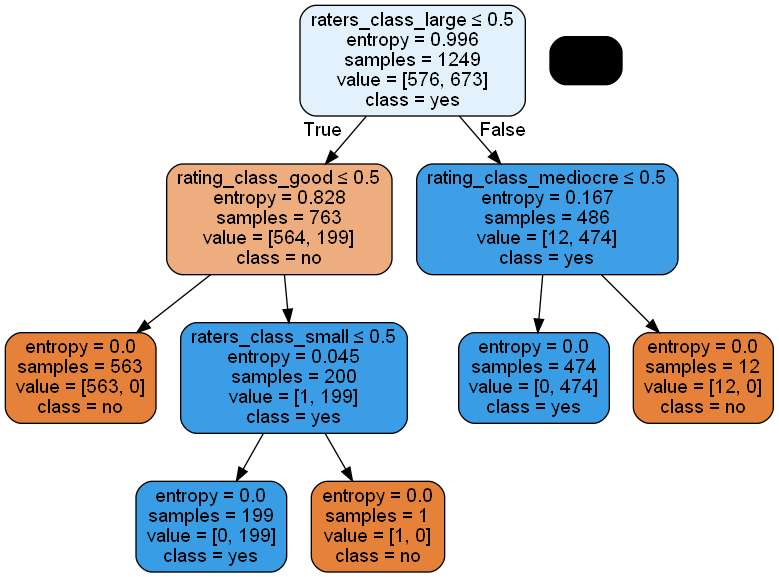

In [49]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, 
                     feature_names=X.columns,  
                     class_names=["no", "yes"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('read_horror.png')
Image(graph.create_png())

In [54]:
#Trying to predict new data
# good rating class, small rater class
X_test = pd.DataFrame({ "rating_class_good" : [1],
                        "rating_class_above average" : [0],
                        "rating_class_mediocre" : [0], 
                        "raters_class_large" : [0],
                        "raters_class_medium" : [0],
                        "raters_class_small" : [1],
                    })

y_predict= model.predict(X_test)
print("Test 1: ", y_predict)

# good rating class, small rater class
X_test = pd.DataFrame({ "rating_class_good" : [0],
                        "rating_class_above average" : [1],
                        "rating_class_mediocre" : [0], 
                        "raters_class_large" : [0],
                        "raters_class_medium" : [1],
                        "raters_class_small" : [1],
                    })

y_predict= model.predict(X_test)
print("Test 2: ", y_predict)

# good rating class, small rater class
X_test = pd.DataFrame({ "rating_class_good" : [0],
                        "rating_class_above average" : [1],
                        "rating_class_mediocre" : [0], 
                        "raters_class_large" : [1],
                        "raters_class_medium" : [0],
                        "raters_class_small" : [0],
                    })

y_predict= model.predict(X_test)
print("Test 3: ", y_predict)

Test 1:  ['no']
Test 2:  ['no']
Test 3:  ['yes']
